#### **Project Details**

**Guided Project**

**Due Date:**  23/04/2025

**Contributors:** 
* Kyle Gregory Smith (577999)
* Caitlin Burnett (600330)
* Paul-Dieter Brandt (600948)
* Christoffel Martinus (577963)

## Data-Driven Student Support at BrightPath Academy (TBD)

### 1. Problem Statement
BrightPath Academy is committed to providing a well-rounded education that nurtures both academic excellence and personal growth. However, the school faces several challenges that hinder its ability to fully support every student. Currently, **the absence of real-time insights** means that struggling students may go unnoticed until its too late, if no form of intervention is administered to help them. Additionally, educators **lack targeted support strategies**, making it difficult to personalize academic assistance such as tutoring or mentoring.

While extracurricular activities are encouraged, **there is limited data** on their impact on academic performance, preventing educators from leveraging these programs to enhance student success. Moreover, the school collects vast amounts of student data, but **without a centralized, intuitive platform**, translating this information into actionable insights for student support remains a challenge.

To address these issues, BrightPath Academy is working to implement a **data-driven system** that identifies at-risk students in real time, enables educators to personalize interventions based on student needs, and provides clear insights into the impact of extracurricular involvement. By doing so, the academy **aims to enhance student outcomes, streamline academic support, and foster a more effective learning environment** for all learners.

### 2. Hypothesis


### 3. Importing Libraries & Data

In [2]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
import os
import xgboost as xgb
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score, mean_absolute_percentage_error, explained_variance_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Dense, Dropout, LeakyReLU, Input, Concatenate
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.models import load_model
from tensorflow.keras.models import Model


#Import csv files
df_original = pd.read_csv('../data/Student_performance_data.csv')               #.. goes up in the directory
df_original_cleaned = df_original.copy()                                           #Use throughout 

### 4. Understanding the data

#### Data Attributes:

In [3]:
#Looking at a data smample
df_original_cleaned.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [4]:
#dataset shape and datatypes
df_original_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [5]:
#Dataset statistics
df_original_cleaned.describe().T 

,count,mean,std,min,25%,50%,75%,max
StudentID,2392.0,2196.500000,690.655244,1001.000000,1598.750000,2196.500000,2794.250000,3392.000000
Age,2392.0,16.468645,1.123798,15.000000,15.000000,16.000000,17.000000,18.000000
Gender,2392.0,0.510870,0.499986,0.000000,0.000000,1.000000,1.000000,1.000000
Ethnicity,2392.0,0.877508,1.028476,0.000000,0.000000,0.000000,2.000000,3.000000
ParentalEducation,2392.0,1.746237,1.000411,0.000000,1.000000,2.000000,2.000000,4.000000
StudyTimeWeekly,2392.0,9.771992,5.652774,0.001057,5.043079,9.705363,14.408410,19.978094
Absences,2392.0,14.541388,8.467417,0.000000,7.000000,15.000000,22.000000,29.000000
Tutoring,2392.0,0.301421,0.458971,0.000000,0.000000,0.000000,1.000000,1.000000
ParentalSupport,2392.0,2.122074,1.122813,0.000000,1.000000,2.000000,3.000000,4.000000
Extracurricular,2392.0,0.383361,0.486307,0.000000,0.000000,0.000000,1.000000,1.000000


### Observations/Insights


#### Dataset Shape and Data Types:

We loaded the dataset and explored the basic structure:

- The dataset has 2392 rows and 15 columns.
- The columns include categorical variables such as `gender`, `course`, etc.
- Some values may need cleaning or encoding (e.g., converting Yes/No to 1/0).
- Column names are suitable, no need to standardize.



### 5. Exploring the Data

#### A. Univariate Analysis:
Univariate analysis involves examining one variable at a time from the dataset. This helps us understand the distribution, central tendency (mean, median, mode), spread (standard deviation, range), and any patterns or anomalies present within a single feature

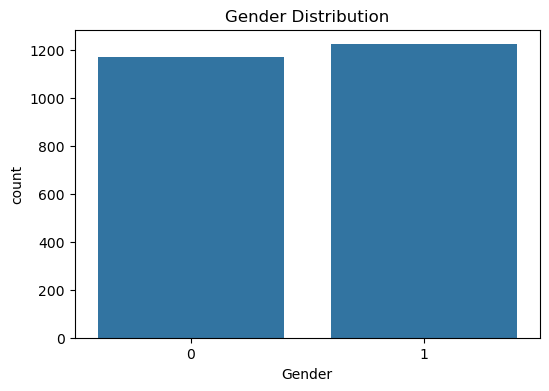

In [6]:
#Visualizing the gender distribution
plt.figure(figsize=(6,4))

sns.countplot(x='Gender', data=df_original_cleaned)
plt.title('Gender Distribution')
plt.show()

<Axes: xlabel='GPA', ylabel='Count'>

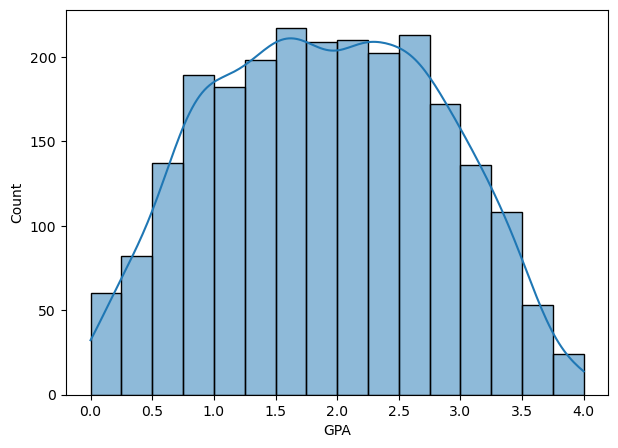

In [7]:
#Hstogram to visualize the distribution of the student marks
plt.figure(figsize=(7,5))

sns.histplot(df_original_cleaned['GPA'], bins=np.arange(0, 4.25, 0.25), kde=True)


#### B. Bi-variate Analysis:
Bivariate analysis examines the relationship between two variables from the dataset — typically an independent (input) variable and a dependent (output) variable. This helps in identifying trends, correlations, and how input features may impact the target outcome



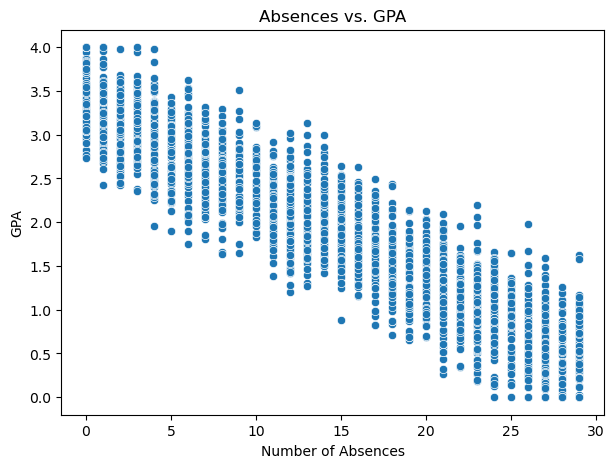

In [8]:
#Visualising the correlation between absences and GPA
plt.figure(figsize=(7, 5))
sns.scatterplot(x='Absences', y='GPA', data=df_original_cleaned)
plt.title('Absences vs. GPA')
plt.xlabel('Number of Absences')
plt.ylabel('GPA')
plt.show()


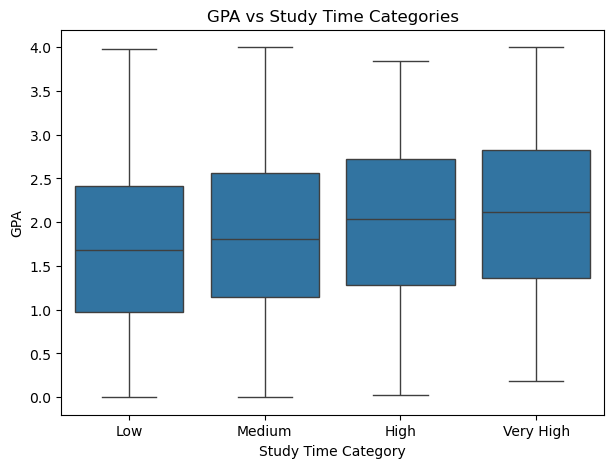

In [9]:
# Visualizing the relationship between GPA and Weekly Study Time

# Step 1: Define bins and labels
bins = [0, 5, 10, 15, 20]
labels = ['Low', 'Medium', 'High', 'Very High']

# Step 2: Convert numerical study time into categories
df_original_cleaned['StudyTimeCategory'] = pd.cut(df_original_cleaned['StudyTimeWeekly'], bins=bins, labels=labels, include_lowest=True)

# Step 3: Create the boxplot using the new categorical column
fig, ax = plt.subplots(figsize=(7, 5))
sns.boxplot(x='StudyTimeCategory', y='GPA', data=df_original_cleaned)
plt.title('GPA vs Study Time Categories')
plt.xlabel('Study Time Category')
plt.ylabel('GPA')
plt.show()


#### Insights and Correlations

1. **Gender Distribution**:
The gender distribution in the dataset is almost balanced, with equal representation of males and females. This provides a fair comparison for further analysis of GPA and other factors.

2. **Student Mark Distribution**:
The distribution of student marks shows a relatively normal pattern with a slight right skew. This indicates that most students are performing at the lower to mid-range marks, but there is a smaller group of students with higher scores."


3. **GPA vs. Study Time**:
The analysis suggests a positive correlation between weekly study time and GPA. Students who study more regularly tend to achieve higher GPAs, supporting the idea that consistent effort contributes to better academic performance.

4. **GPA vs. Absences**:
There seems to be a strong negative correlation between GPA and absences. As absences increase, GPA tends to decrease. This implies that attendance might play a role in academic success. 


### 6. Data Cleaning and Preprocessing

In [10]:
# Remove unnecessary columns
df_original_cleaned.drop(columns=['Ethnicity'], inplace=True)

# Check the result
print(df_original_cleaned.columns)

Index(['StudentID', 'Age', 'Gender', 'ParentalEducation', 'StudyTimeWeekly',
       'Absences', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports',
       'Music', 'Volunteering', 'GPA', 'GradeClass', 'StudyTimeCategory'],
      dtype='object')


In [11]:
# Check for missing values and duplicates
missing_values = df_original_cleaned.isnull().sum()
duplicates = df_original_cleaned[df_original_cleaned.duplicated()]

#Print missing values
if missing_values.sum() > 0:
    print(missing_values[missing_values > 0].to_string())
else:
    print("No Missing Values Found")


# Print Duplicate Rows 
if duplicates.empty:
     print("No Duplicates Found")
else:
    print("Duplicates Found")
    print(duplicates)


No Missing Values Found
No Duplicates Found


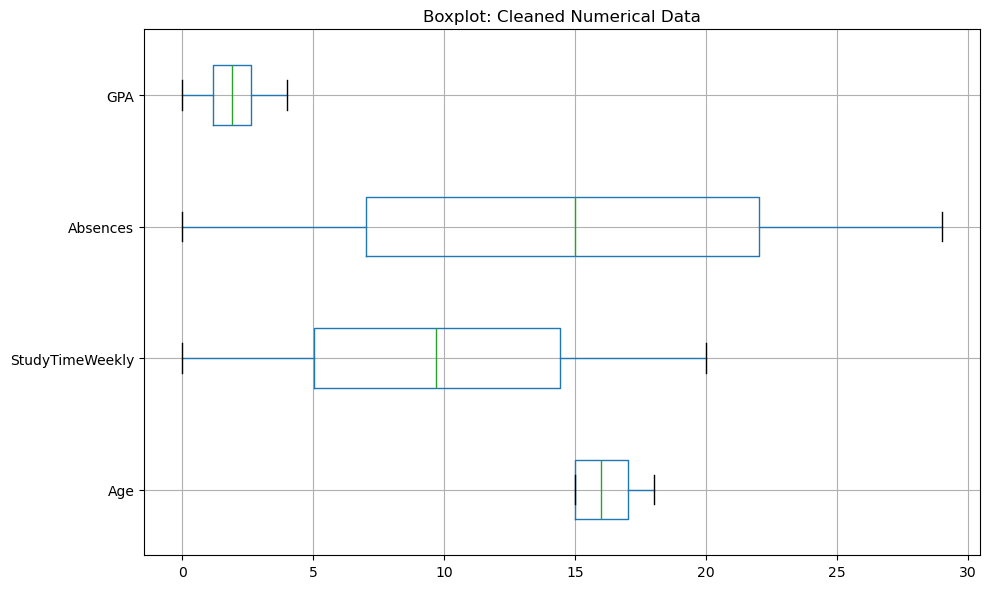

In [12]:
# Select only numerical (continuous) columns for the boxplot
numerical_columns =df_original_cleaned.select_dtypes(include=['float64', 'int64']).columns
# Drop encoded categorical columns
columns_to_exclude = ['Gender', 'ParentalEducation', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GradeClass', 'StudentID']
relevant_columns = [col for col in numerical_columns if col not in columns_to_exclude]

# Boxplot for cleaned numerical data
fig, ax = plt.subplots(figsize=(10, 6))
df_original_cleaned[relevant_columns].boxplot(vert=0, ax=ax)
ax.set_title('Boxplot: Cleaned Numerical Data')
plt.tight_layout()
plt.show()


### 7. Feature Engineering

Create dataset copy for Feature Engineering

In [13]:
df_original_cleaned_FE = df_original_cleaned.copy() 

BrightPath Academy Problems: 
1. Delayed Student Risk Identification.
2. Determine student needs to create support structures.
3. Identify academic impact of extracurricular activities.
4. Can't use collected data to determine strategies.

Who are at risk students? 
A student who has a GPA below the class average can be considered a "at risk student".

In [14]:
average_gpa = df_original_cleaned_FE['GPA'].mean() #get the average GPA for the dataset
print("Average gpa :", average_gpa)

below_average_students = df_original_cleaned_FE[df_original_cleaned_FE['GPA'] < average_gpa]
print("Number of students below average GPA:", len(below_average_students))
below_average_student_ids = below_average_students['StudentID'].tolist()
print("IDs of students below average GPA:", below_average_student_ids)


Average gpa : 1.9061863027265407
Number of students below average GPA: 1206
IDs of students below average GPA: [1003, 1005, 1008, 1012, 1013, 1014, 1016, 1018, 1019, 1022, 1023, 1024, 1025, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037, 1038, 1040, 1041, 1048, 1053, 1054, 1055, 1056, 1057, 1058, 1060, 1061, 1067, 1068, 1069, 1072, 1076, 1079, 1080, 1082, 1084, 1086, 1087, 1088, 1089, 1091, 1096, 1097, 1099, 1100, 1101, 1103, 1104, 1105, 1107, 1108, 1109, 1116, 1117, 1118, 1119, 1123, 1130, 1138, 1142, 1143, 1149, 1152, 1153, 1154, 1157, 1159, 1160, 1162, 1166, 1170, 1171, 1172, 1175, 1176, 1178, 1182, 1186, 1189, 1190, 1191, 1196, 1198, 1199, 1200, 1201, 1202, 1205, 1207, 1208, 1209, 1210, 1212, 1216, 1217, 1219, 1220, 1221, 1225, 1226, 1227, 1228, 1229, 1231, 1232, 1233, 1235, 1238, 1239, 1240, 1242, 1245, 1247, 1248, 1249, 1251, 1255, 1259, 1262, 1263, 1264, 1265, 1267, 1268, 1269, 1270, 1271, 1272, 1274, 1277, 1278, 1280, 1281, 1283, 1286, 1287, 1288, 1291, 1292, 1296, 1300, 1301, 

How do we determine a high risk student before their GPA is influenced? 
1. Determine factors that influence student performance.

In [15]:
df_original_cleaned_FE.head()

,StudentID,Age,Gender,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass,StudyTimeCategory
0,1001,17,1,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0,Very High
1,1002,18,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0,Very High
2,1003,15,0,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0,Low
3,1004,17,1,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0,High
4,1005,17,1,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0,Low


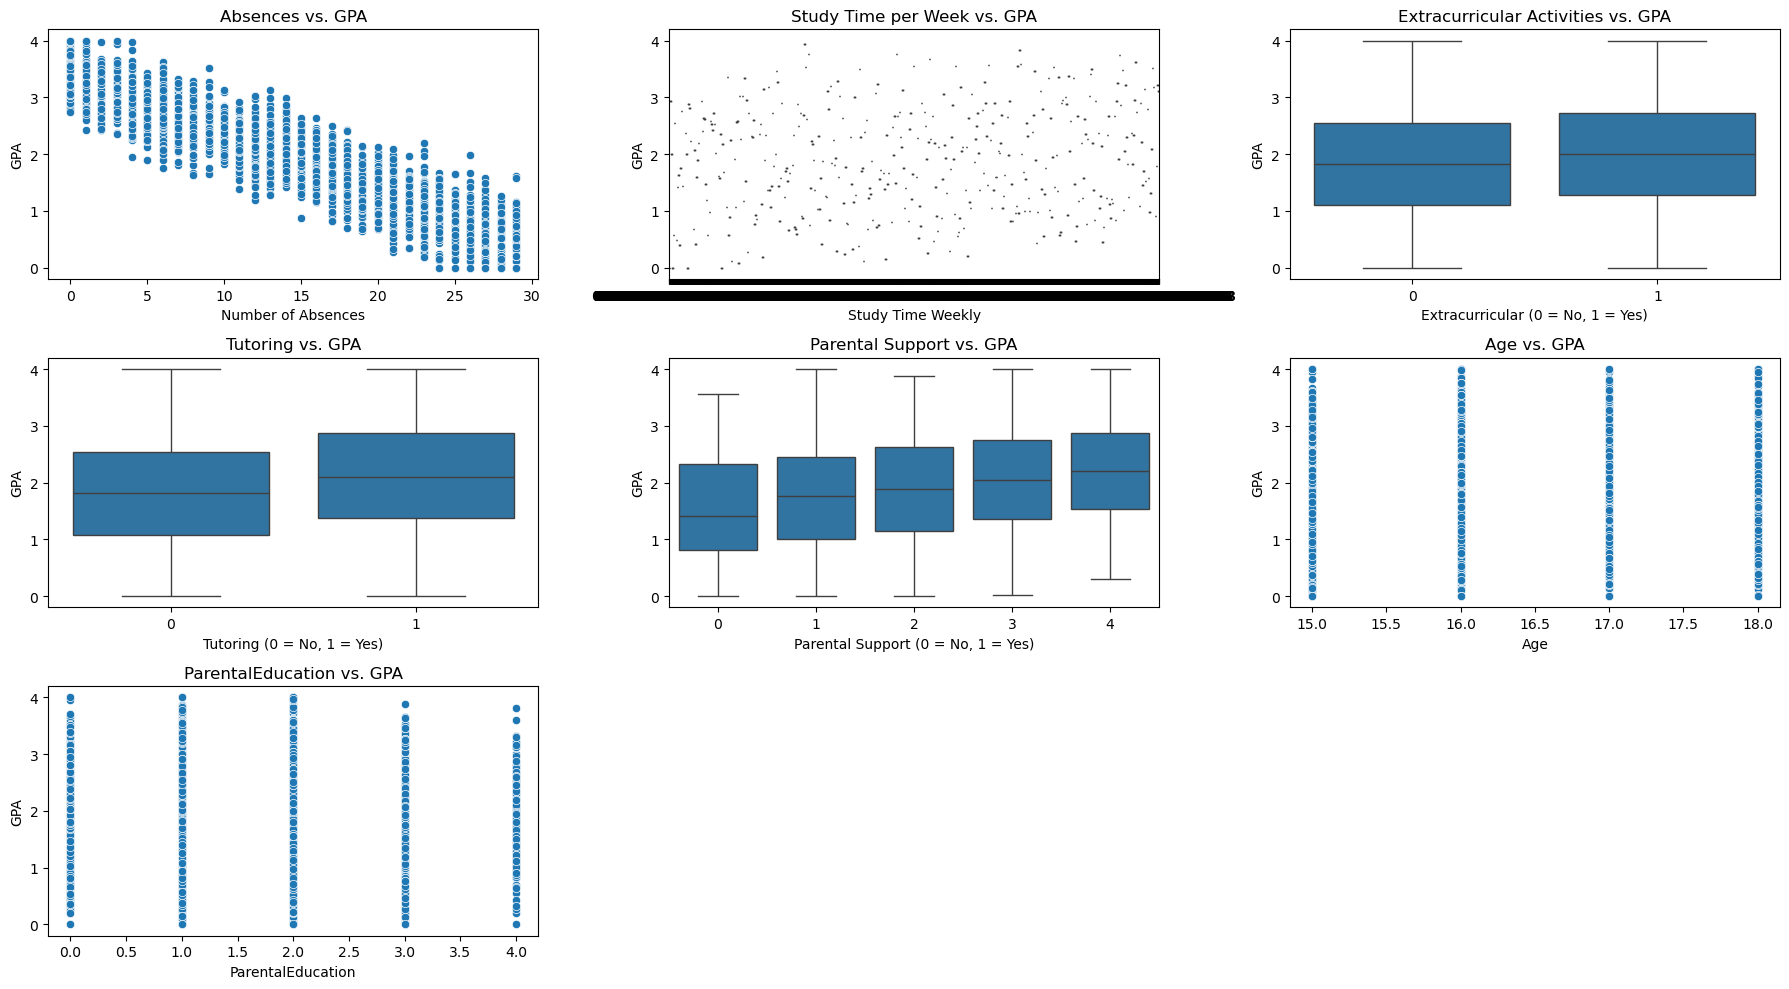

In [16]:
# (2 rows, 3 columns)
fig, axes = plt.subplots(3, 3, figsize=(18, 10))
axes = axes.flatten()  # Flatten 2D array to make indexing easier

# Plot 1: Absences vs. GPA
sns.scatterplot(x='Absences', y='GPA', data=df_original_cleaned_FE, ax=axes[0])
axes[0].set_title('Absences vs. GPA')
axes[0].set_xlabel('Number of Absences')
axes[0].set_ylabel('GPA')

# Plot 2: Study Time vs. GPA
sns.boxplot(x='StudyTimeWeekly', y='GPA', data=df_original_cleaned_FE, ax=axes[1])
axes[1].set_title('Study Time per Week vs. GPA')
axes[1].set_xlabel('Study Time Weekly')
axes[1].set_ylabel('GPA')

# Plot 3: Extracurricular vs. GPA
sns.boxplot(x='Extracurricular', y='GPA', data=df_original_cleaned_FE, ax=axes[2])
axes[2].set_title('Extracurricular Activities vs. GPA')
axes[2].set_xlabel('Extracurricular (0 = No, 1 = Yes)')
axes[2].set_ylabel('GPA')

# Plot 4: Tutoring vs. GPA
sns.boxplot(x='Tutoring', y='GPA', data=df_original_cleaned_FE, ax=axes[3])
axes[3].set_title('Tutoring vs. GPA')
axes[3].set_xlabel('Tutoring (0 = No, 1 = Yes)')
axes[3].set_ylabel('GPA')

# Plot 5: Parental Support vs. GPA
sns.boxplot(x='ParentalSupport', y='GPA', data=df_original_cleaned_FE, ax=axes[4])
axes[4].set_title('Parental Support vs. GPA')
axes[4].set_xlabel('Parental Support (0 = No, 1 = Yes)')
axes[4].set_ylabel('GPA')

# Plot 6: Age vs. GPA (or any other interesting numeric column)
sns.scatterplot(x='Age', y='GPA', data=df_original_cleaned_FE, ax=axes[5])
axes[5].set_title('Age vs. GPA')
axes[5].set_xlabel('Age')
axes[5].set_ylabel('GPA')

# Plot 7: Parent Education vs. GPA (or any other interesting numeric column)
sns.scatterplot(x='ParentalEducation', y='GPA', data=df_original_cleaned_FE, ax=axes[6])
axes[6].set_title('ParentalEducation vs. GPA')
axes[6].set_xlabel('ParentalEducation')
axes[6].set_ylabel('GPA')

#Remove extra grpaphs
for i in range(7, len(axes)):
    fig.delaxes(axes[i])


# Layout adjustment
plt.tight_layout()
plt.show()


Risk Identification for student performance can be linked to:
1. Absence, students with high absence rates has a strong corelation to a low GPA
2. Tutoring, Students who are tutored perform better that students who are not tutored.
3. Parental support, Students with more parental support perform better than students with no parental support.
4. Extracurricular Activities, students who perform Extracurricular Activities has slightly higher GPAs.

Age, Study Time and parental education has little impact on gpa according to the data since the datapoints are evenly distributed.

At Risk Students column creation and other features:

In [17]:
df_original_cleaned_FE['SupportScore'] = (
    (df_original_cleaned_FE['ParentalSupport'] / 4) * 0.45 +
    (df_original_cleaned_FE['ParentalEducation'] / 4) * 0.1 +
    df_original_cleaned_FE['Tutoring'] * 0.45
)

average_gpa = df_original_cleaned_FE['GPA'].mean()
df_original_cleaned_FE['AtRisk'] = ((df_original_cleaned_FE['GPA'] < average_gpa) & 
                                    (df_original_cleaned_FE['Absences'] > 10) & 
                                    (df_original_cleaned_FE['SupportScore'] < 0.5)).astype(int)

def risk_category(row):
    if row['GPA'] < 2.5 and row['Absences'] > 15:
        return 'High Risk'
    elif row['GPA'] < 3.0 and row['Absences'] > 10:
        return 'Medium Risk'
    elif row['GPA'] < 3.3 and row['Absences'] > 5:
        return 'Low Risk'
    else:
        return 'No Risk'

df_original_cleaned_FE['RiskLevel'] = df_original_cleaned_FE.apply(risk_category, axis=1)

df_original_cleaned_FE['ActivityScore'] = (df_original_cleaned_FE['Sports'] + 
                                           df_original_cleaned_FE['Music'] + 
                                           df_original_cleaned_FE['Volunteering'] + 
                                           df_original_cleaned_FE['Extracurricular'])

df_original_cleaned_FE['Absence_StudyTime_Interaction'] = (df_original_cleaned_FE['Absences'] * 
                                                          df_original_cleaned_FE['StudyTimeWeekly'])
df_original_cleaned_FE['ParentalSupport_StudyTime'] = (df_original_cleaned_FE['ParentalSupport'] * 
                                                       df_original_cleaned_FE['StudyTimeWeekly'])

df_original_cleaned_FE['AbsenceBin'] = pd.cut(df_original_cleaned_FE['Absences'], 
                                              bins=[0, 5, 10, 15, 30], 
                                              labels=['Few', 'Moderate', 'Many', 'Excessive'])
df_original_cleaned_FE['StudyTimeBin'] = pd.cut(df_original_cleaned_FE['StudyTimeWeekly'], 
                                                bins=[0, 5, 10, 15, 20], 
                                                labels=['Minimal', 'Moderate', 'Substantial', 'Extensive'])

# New features to add
df_original_cleaned_FE['StudyTime_per_Absence'] = (df_original_cleaned_FE['StudyTimeWeekly'] / 
                                                   (df_original_cleaned_FE['Absences'] + 1))

df_original_cleaned_FE['Support_per_Activity'] = (df_original_cleaned_FE['SupportScore'] / 
                                                  (df_original_cleaned_FE['ActivityScore'] + 1))

df_original_cleaned_FE['Absences_squared'] = df_original_cleaned_FE['Absences'] ** 2

df_original_cleaned_FE['StudyTimeWeekly_squared'] = df_original_cleaned_FE['StudyTimeWeekly'] ** 2

df_original_cleaned_FE['Tutoring_StudyTime_Interaction'] = (df_original_cleaned_FE['Tutoring'] * 
                                                            df_original_cleaned_FE['StudyTimeWeekly'])

df_original_cleaned_FE['MultipleActivities'] = (df_original_cleaned_FE['ActivityScore'] > 1).astype(int)

# Display the updated DataFrame
df_original_cleaned_FE.head()

,StudentID,Age,Gender,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,...,Absence_StudyTime_Interaction,ParentalSupport_StudyTime,AbsenceBin,StudyTimeBin,StudyTime_per_Absence,Support_per_Activity,Absences_squared,StudyTimeWeekly_squared,Tutoring_StudyTime_Interaction,MultipleActivities
0,1001,17,1,2,19.833723,7,1,2,0,0,...,138.836060,39.667446,Moderate,Extensive,2.479215,0.36250,49,393.376560,19.833723,0
1,1002,18,0,1,15.408756,0,0,1,0,0,...,0.000000,15.408756,NaN,Extensive,15.408756,0.13750,0,237.429763,0.000000,0
2,1003,15,0,3,4.210570,26,0,2,0,0,...,109.474814,8.421140,Excessive,Minimal,0.155947,0.30000,676,17.728898,0.000000,0
3,1004,17,1,3,10.028829,14,0,3,1,0,...,140.403613,30.086488,Many,Substantial,0.668589,0.20625,196,100.577421,0.000000,0
4,1005,17,1,2,4.672495,17,1,3,0,0,...,79.432420,14.017486,Excessive,Minimal,0.259583,0.83750,289,21.832212,4.672495,0


In [18]:
## Check for NaN values : 
columns_to_check = [
    'StudentID', 'Age', 'Gender', 'ParentalEducation', 'StudyTimeWeekly',
    'Absences', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports',
    'GradeClass', 'StudyTimeCategory', 'SupportScore', 'AtRisk', 'RiskLevel',
    'ActivityScore', 'Absence_StudyTime_Interaction', 'ParentalSupport_StudyTime',
    'AbsenceBin', 'StudyTimeBin'
]

df_original_cleaned_FE[columns_to_check].isna().sum()

##Since there are only 67 nan values in AbsenceBin I will drop them since it won't affect the model much.
df_original_cleaned_FE = df_original_cleaned_FE.dropna(subset=['AbsenceBin'])



At-Risk Students: 833, GPA Mean: 1.08, Median: 1.12
Not At-Risk Students: 1492, GPA Mean: 2.30, Median: 2.37

Mean GPA by Risk Level:
RiskLevel
High Risk      1.127134
Low Risk       2.565019
Medium Risk    2.061344
No Risk        3.051231
Name: GPA, dtype: float64


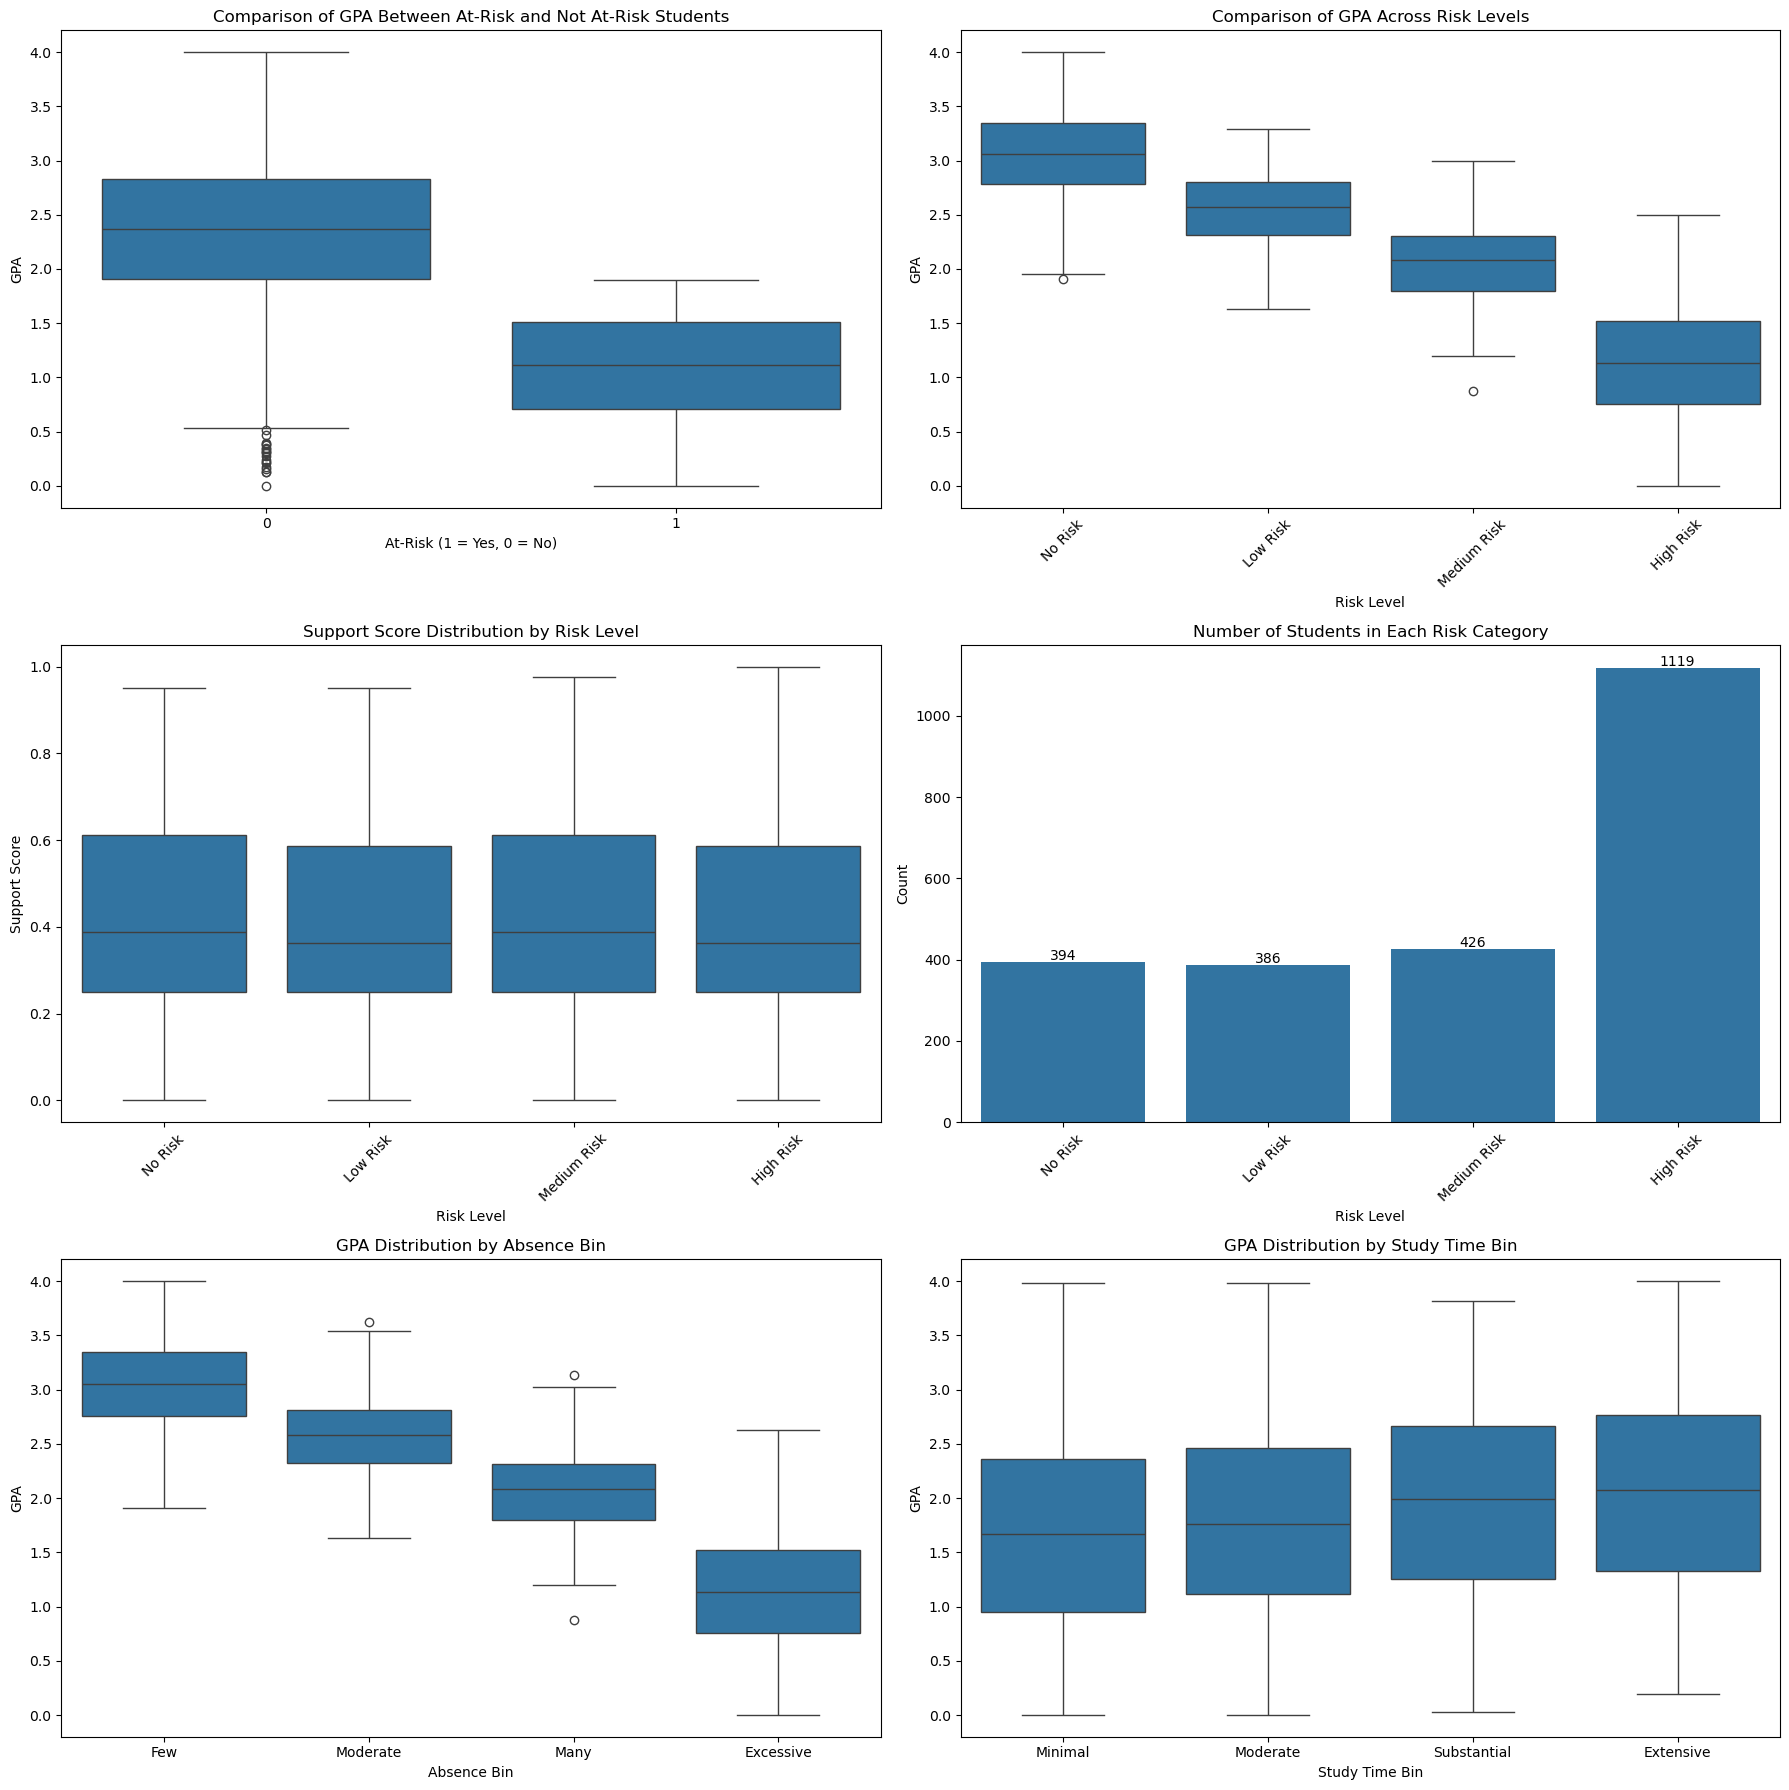

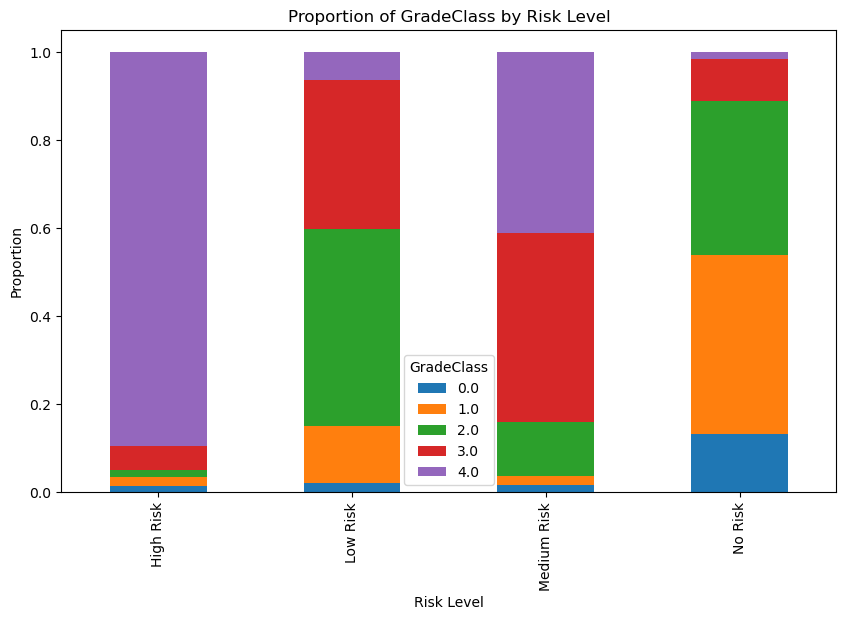

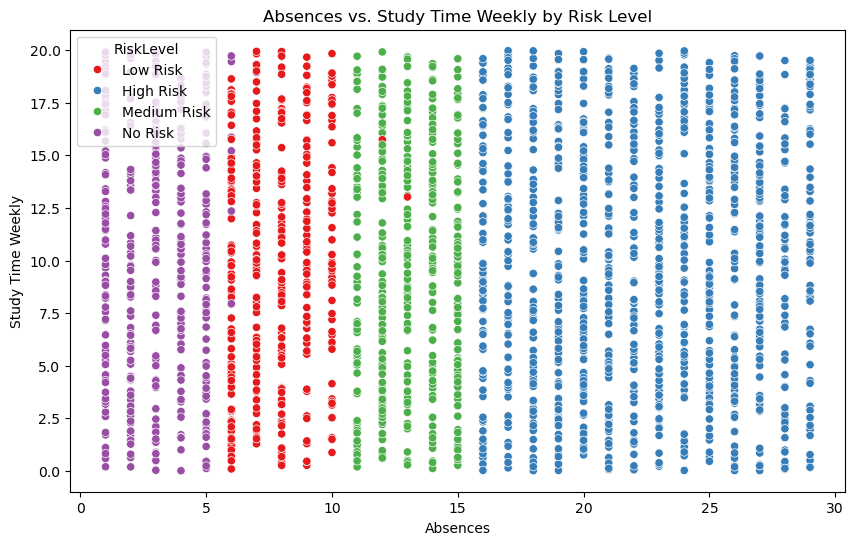

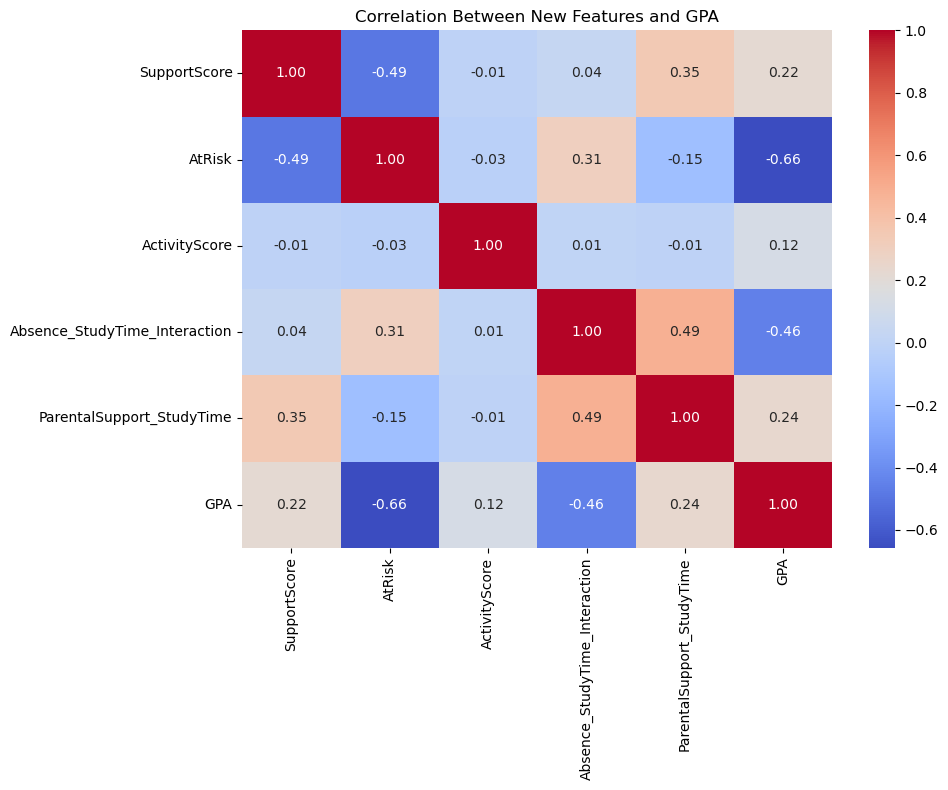

In [19]:

# **Calculate Statistics for At-Risk and Not At-Risk Students**
at_risk_gpa = df_original_cleaned_FE[df_original_cleaned_FE['AtRisk'] == 1]['GPA'].mean()
not_at_risk_gpa = df_original_cleaned_FE[df_original_cleaned_FE['AtRisk'] == 0]['GPA'].mean()
at_risk_gpa_median = df_original_cleaned_FE[df_original_cleaned_FE['AtRisk'] == 1]['GPA'].median()
not_at_risk_gpa_median = df_original_cleaned_FE[df_original_cleaned_FE['AtRisk'] == 0]['GPA'].median()
at_risk_count = df_original_cleaned_FE['AtRisk'].sum()
not_at_risk_count = len(df_original_cleaned_FE) - at_risk_count

# Print enhanced statistics
print(f"At-Risk Students: {at_risk_count}, GPA Mean: {at_risk_gpa:.2f}, Median: {at_risk_gpa_median:.2f}")
print(f"Not At-Risk Students: {not_at_risk_count}, GPA Mean: {not_at_risk_gpa:.2f}, Median: {not_at_risk_gpa_median:.2f}")

# Calculate and print mean GPA by RiskLevel
risk_gpa_means = df_original_cleaned_FE.groupby('RiskLevel')['GPA'].mean()
print("\nMean GPA by Risk Level:")
print(risk_gpa_means)

# **Create a Figure with 3x2 Subplots**
fig, axes = plt.subplots(3, 2, figsize=(18, 18))

# 1. Boxplot: GPA between at-risk and not-at-risk students
sns.boxplot(x='AtRisk', y='GPA', data=df_original_cleaned_FE, ax=axes[0, 0])
axes[0, 0].set_title('Comparison of GPA Between At-Risk and Not At-Risk Students')
axes[0, 0].set_xlabel('At-Risk (1 = Yes, 0 = No)')
axes[0, 0].set_ylabel('GPA')

# 2. Boxplot: GPA across different risk levels
sns.boxplot(x='RiskLevel', y='GPA', data=df_original_cleaned_FE, ax=axes[0, 1], 
            order=['No Risk', 'Low Risk', 'Medium Risk', 'High Risk'])
axes[0, 1].set_title('Comparison of GPA Across Risk Levels')
axes[0, 1].set_xlabel('Risk Level')
axes[0, 1].set_ylabel('GPA')
axes[0, 1].tick_params(axis='x', rotation=45)

# 3. Support Score distribution by Risk Level
sns.boxplot(x='RiskLevel', y='SupportScore', data=df_original_cleaned_FE, ax=axes[1, 0], 
            order=['No Risk', 'Low Risk', 'Medium Risk', 'High Risk'])
axes[1, 0].set_title('Support Score Distribution by Risk Level')
axes[1, 0].set_xlabel('Risk Level')
axes[1, 0].set_ylabel('Support Score')
axes[1, 0].tick_params(axis='x', rotation=45)

# 4. Count of students in each risk category
risk_counts = df_original_cleaned_FE['RiskLevel'].value_counts().reindex(['No Risk', 'Low Risk', 'Medium Risk', 'High Risk'])
sns.barplot(x=risk_counts.index, y=risk_counts.values, ax=axes[1, 1])
axes[1, 1].set_title('Number of Students in Each Risk Category')
axes[1, 1].set_xlabel('Risk Level')
axes[1, 1].set_ylabel('Count')
axes[1, 1].tick_params(axis='x', rotation=45)
for i in range(len(risk_counts)):
    axes[1, 1].text(i, risk_counts.values[i] + 5, str(risk_counts.values[i]), ha='center')

# 5. Boxplot: GPA by AbsenceBin
sns.boxplot(x='AbsenceBin', y='GPA', data=df_original_cleaned_FE, ax=axes[2, 0], 
            order=['Few', 'Moderate', 'Many', 'Excessive'])
axes[2, 0].set_title('GPA Distribution by Absence Bin')
axes[2, 0].set_xlabel('Absence Bin')
axes[2, 0].set_ylabel('GPA')

# 6. Boxplot: GPA by StudyTimeBin
sns.boxplot(x='StudyTimeBin', y='GPA', data=df_original_cleaned_FE, ax=axes[2, 1], 
            order=['Minimal', 'Moderate', 'Substantial', 'Extensive'])
axes[2, 1].set_title('GPA Distribution by Study Time Bin')
axes[2, 1].set_xlabel('Study Time Bin')
axes[2, 1].set_ylabel('GPA')

plt.tight_layout()
plt.show()

# **Stacked Bar Plot: GradeClass Distribution by RiskLevel**
grade_risk_ct = pd.crosstab(df_original_cleaned_FE['RiskLevel'], df_original_cleaned_FE['GradeClass'], normalize='index')
grade_risk_ct.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Proportion of GradeClass by Risk Level')
plt.xlabel('Risk Level')
plt.ylabel('Proportion')
plt.legend(title='GradeClass')
plt.show()

# **Scatter Plot: Absences vs. StudyTimeWeekly by RiskLevel**
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Absences', y='StudyTimeWeekly', hue='RiskLevel', data=df_original_cleaned_FE, palette='Set1')
plt.title('Absences vs. Study Time Weekly by Risk Level')
plt.xlabel('Absences')
plt.ylabel('Study Time Weekly')
plt.show()

# **Correlation Heatmap for New Features and GPA**
new_features = ['SupportScore', 'AtRisk', 'ActivityScore', 
                'Absence_StudyTime_Interaction', 'ParentalSupport_StudyTime']
correlation = df_original_cleaned_FE[new_features + ['GPA']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between New Features and GPA')
plt.tight_layout()
plt.show()

### 8. First Model Development


--- Logistic Regression ---
Accuracy: 0.7032

Classification Report:
              precision    recall  f1-score   support

         0.0       0.15      0.38      0.21        16
         1.0       0.47      0.49      0.48        49
         2.0       0.65      0.46      0.54        76
         3.0       0.64      0.78      0.70        82
         4.0       0.90      0.82      0.86       242

    accuracy                           0.70       465
   macro avg       0.56      0.58      0.56       465
weighted avg       0.74      0.70      0.72       465


--- Random Forest ---
Accuracy: 0.7441

Classification Report:
              precision    recall  f1-score   support

         0.0       0.31      0.25      0.28        16
         1.0       0.46      0.45      0.45        49
         2.0       0.60      0.62      0.61        76
         3.0       0.65      0.62      0.64        82
         4.0       0.90      0.92      0.91       242

    accuracy                           0.74       4

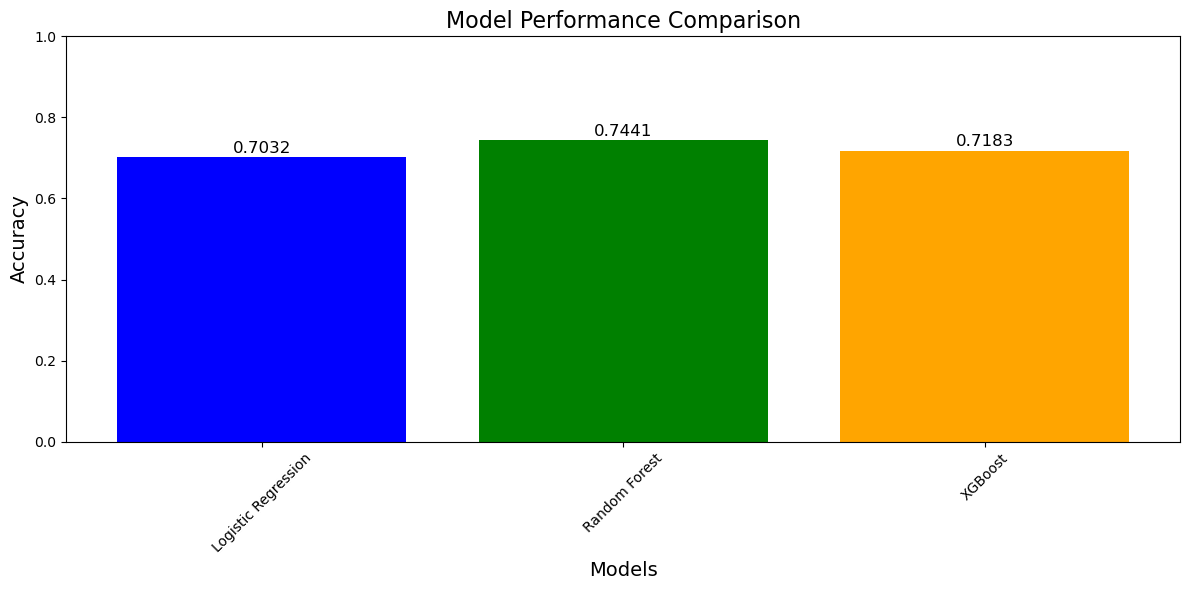


Best performing model: Random Forest with accuracy: 0.7441


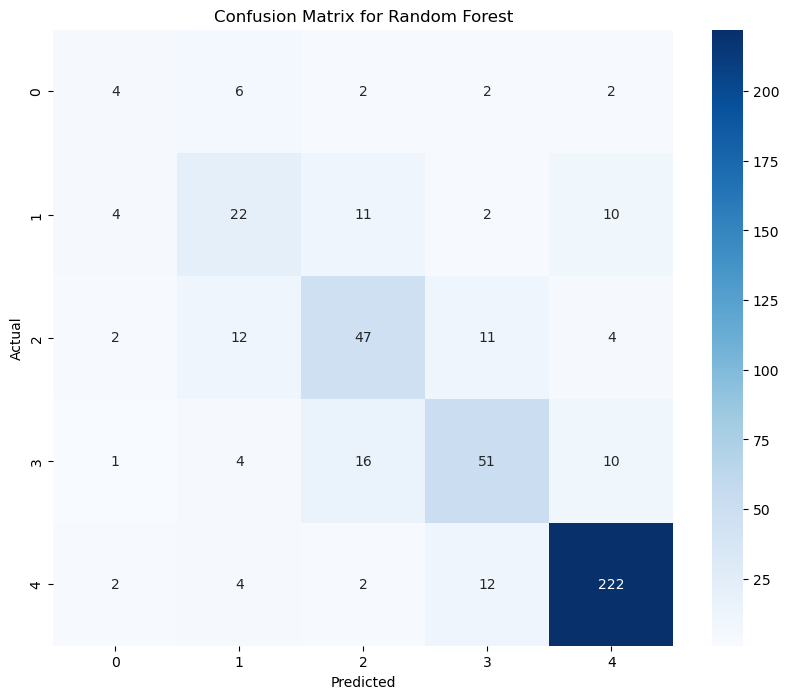

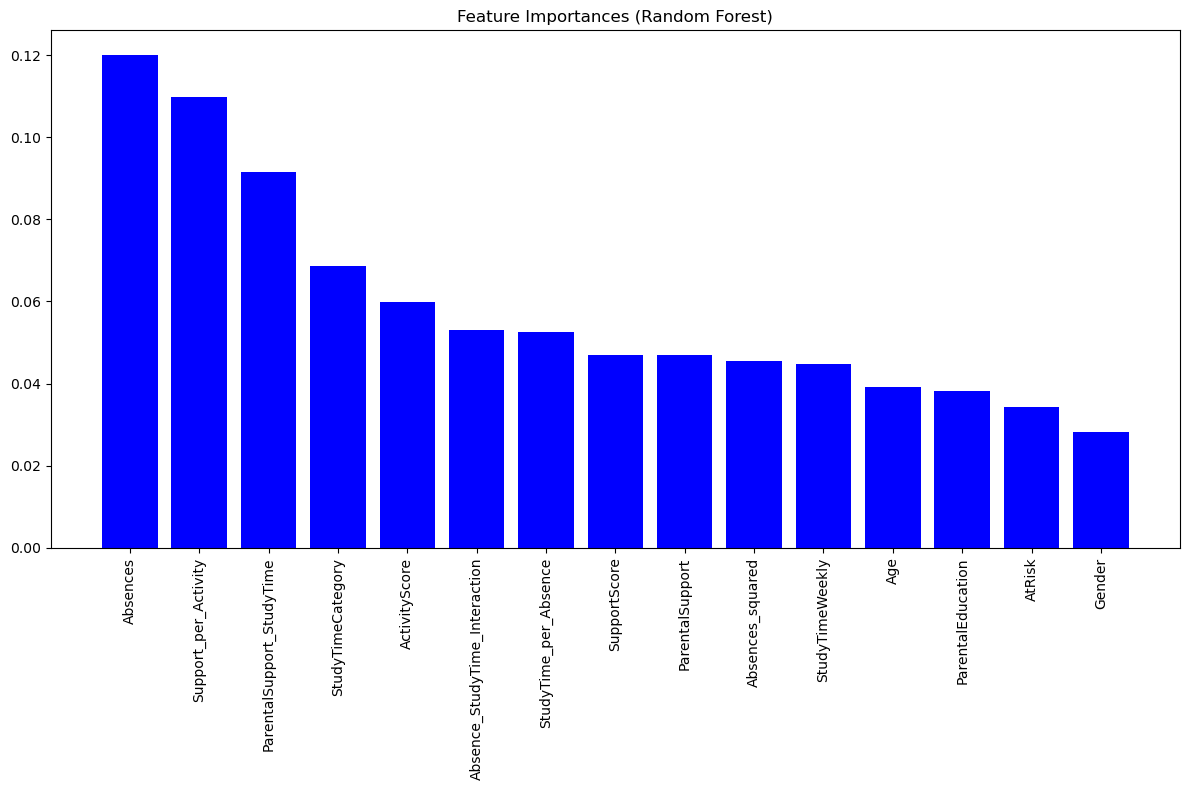

Random Forest model saved as 'best_model.pkl'


In [20]:
# Define features and target variable
X = df_original_cleaned_FE.drop(['GradeClass', 'GPA', 'StudentID'], axis=1)
y = df_original_cleaned_FE['GradeClass']

# Convert categorical RiskLevel to numerical for modeling
risk_level_encoded = pd.get_dummies(X['RiskLevel'], prefix='Risk')
X = pd.concat([X.drop('RiskLevel', axis=1), risk_level_encoded], axis=1)

# Handle other categorical columns
if 'AbsenceBin' in X.columns and 'StudyTimeBin' in X.columns:
    absence_bin_encoded = pd.get_dummies(X['AbsenceBin'], prefix='Absence')
    study_time_bin_encoded = pd.get_dummies(X['StudyTimeBin'], prefix='StudyTime')
    X = pd.concat([X.drop(['AbsenceBin', 'StudyTimeBin'], axis=1), 
                  absence_bin_encoded, study_time_bin_encoded], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=80, stratify=y)

# Select only numeric columns
X_train_numeric = X_train.select_dtypes(include=[np.number])
X_test_numeric = X_test.select_dtypes(include=[np.number])


#scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numeric)
X_test_scaled = scaler.transform(X_test_numeric)

#SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Dictionary to store model performances
model_performances = {}

# Model 1: Logistic Regression
print("\n--- Logistic Regression ---")
lr_model = LogisticRegression(max_iter=1000, random_state=80)
lr_model.fit(X_train_resampled, y_train_resampled)
y_pred_lr = lr_model.predict(X_test_scaled)
lr_accuracy = accuracy_score(y_test, y_pred_lr)
model_performances['Logistic Regression'] = lr_accuracy
print(f"Accuracy: {lr_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))

# Model 2: Random Forest
print("\n--- Random Forest ---")
rf_model = RandomForestClassifier(random_state=80)
rf_model.fit(X_train_resampled, y_train_resampled)
y_pred_rf = rf_model.predict(X_test_scaled)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
model_performances['Random Forest'] = rf_accuracy
print(f"Accuracy: {rf_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

# Model 3: XGBoost
print("\n--- XGBoost ---")
xgb_model = xgb.XGBClassifier(random_state=80)
xgb_model.fit(X_train_resampled, y_train_resampled)
y_pred_xgb = xgb_model.predict(X_test_scaled)
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
model_performances['XGBoost'] = xgb_accuracy
print(f"Accuracy: {xgb_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))

# See performance
plt.figure(figsize=(12, 6))
models = list(model_performances.keys())
accuracies = list(model_performances.values())
colors = ['blue', 'green', 'orange']

# Create bar chart
plt.bar(models, accuracies, color=colors)
plt.title('Model Performance Comparison', fontsize=16)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.ylim(0, 1.0)
plt.xticks(rotation=45)

# Add accuracy values
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center', fontsize=12)

plt.tight_layout()
plt.savefig('model_comparison.png')
plt.show()

# Plot confusion matrix for the best model
best_model_name = max(model_performances, key=model_performances.get)
print(f"\nBest performing model: {best_model_name} with accuracy: {model_performances[best_model_name]:.4f}")

plt.figure(figsize=(10, 8))
if best_model_name == 'Logistic Regression':
    best_y_pred = y_pred_lr
    best_model = lr_model
elif best_model_name == 'Random Forest':
    best_y_pred = y_pred_rf
    best_model = rf_model
else: 
    best_y_pred = y_pred_xgb
    best_model = xgb_model

cm = confusion_matrix(y_test, best_y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix for {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('best_model_confusion_matrix.png')
plt.show()

# Feature importance for Random Forest
if 'Random Forest' in model_performances:
    feature_names = X.columns
    importances = rf_model.feature_importances_
    indices = np.argsort(importances)[::-1]
    
    plt.figure(figsize=(12, 8))
    plt.title('Feature Importances (Random Forest)')
    plt.bar(range(len(indices[:15])), importances[indices[:15]], color='b', align='center')
    plt.xticks(range(len(indices[:15])), [feature_names[i] for i in indices[:15]], rotation=90)
    plt.tight_layout()
    plt.savefig('feature_importances.png')
    plt.show()

# Saved model
best_model_data = {
    'model': best_model,
    'scaler': scaler,
    'feature_names': list(X.columns)
}

with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_model_data, f)
print(f"{best_model_name} model saved as 'best_model.pkl'")

#### Evaluate First Model Metrics

### 9. Second Model Development

Tuned model (final model)

Has already been saved with the following metrics:

Test Loss (MSE): 0.041181039065122604

Test MAE: 0.16113990545272827

Test RMSE: 0.2029311190160903

Test R²: 0.950200246874295

In [21]:
nn_df = df_original_cleaned.copy()

nn_df.drop(columns=["StudentID", "Age", "Gender"], inplace=True)


# nn_df['StudyEfficiency'] = nn_df['StudyTimeWeekly'] / (nn_df['GPA'] + 1)
# # nn_df['EfficiencyLevel'] = pd.qcut(nn_df['StudyEfficiency'], q=3, labels=['Low', 'Medium', 'High'])
# nn_df['EngagementScore'] = nn_df[['Extracurricular', 'Volunteering', 'Sports', 'Music']].sum(axis=1)
# nn_df["EngagementStudyInteraction"] = nn_df["EngagementScore"] * nn_df["StudyEfficiency"]
# nn_df['IsOverwhelmed'] = (nn_df['EfficiencyLevel'] == 'Low') & (nn_df['StudyTimeWeekly'] > 10) & (nn_df['GPA'] < 2.0)

# Create EngagementSupport: EngagementScore × ParentalSupport
# nn_df['EngagementSupport'] = nn_df['EngagementScore'] * nn_df['ParentalSupport']

# efficiency_map = {'Low': 0, 'Medium': 1, 'High': 2}
# nn_df['EfficiencyLevel'] = nn_df['EfficiencyLevel'].map(efficiency_map)
# nn_df['IsOverwhelmed'] = nn_df['IsOverwhelmed'].astype(int)




# # Create interaction feature between Tutoring and Absences
# nn_df['TutoringAbsenceInteraction'] = nn_df['Tutoring'] * nn_df['Absences']



In [22]:
features = [
    'ParentalEducation',
    'StudyTimeWeekly',
    'Absences',
    'Tutoring',
    'ParentalSupport',
    'Extracurricular',
    'Sports',
    'Music',
    'Volunteering',
    # 'EngagementSupport',
    # 'EngagementStudyInteraction'
    # 'StudyEfficiency',
    # 'EfficiencyLevel',
    # 'EngagementScore',
    # 'IsOverwhelmed',
    # 'TutoringAbsenceInteraction'
]

gpa_target = 'GPA'



In [23]:
# Separate features and target
X = nn_df[features]
y = nn_df[gpa_target]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [24]:
scaler = MinMaxScaler() # produced 0.05 % better results than standardscaler
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model
model = Sequential()
model.add(Dense(128, input_dim=X_train_scaled.shape[1]))
model.add(LeakyReLU(alpha=0.01))

model.add(Dense(64))
model.add(LeakyReLU(alpha=0.01))
model.add(Dropout(0.2))  # Balanced dropout

model.add(Dense(32))
model.add(LeakyReLU(alpha=0.01))
model.add(Dropout(0.3))

model.add(Dense(1))  # Output

# Compile
optimizer = Adam(learning_rate=0.0003)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae', 'mse'])

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=15  , restore_best_weights=True)

# Train
history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=200,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)


c:\Users\MC\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\MC\anaconda3\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 3.6216 - mae: 1.6744 - mse: 3.6216 - val_loss: 1.5960 - val_mae: 1.0358 - val_mse: 1.5960
Epoch 2/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.3594 - mae: 0.9630 - mse: 1.3594 - val_loss: 0.8608 - val_mae: 0.7894 - val_mse: 0.8608
Epoch 3/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9854 - mae: 0.8154 - mse: 0.9854 - val_loss: 0.5483 - val_mae: 0.6260 - val_mse: 0.5483
Epoch 4/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6421 - mae: 0.6559 - mse: 0.6421 - val_loss: 0.2751 - val_mae: 0.4264 - val_mse: 0.2751
Epoch 5/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4013 - mae: 0.5085 - mse: 0.4013 - val_loss: 0.1522 - val_mae: 0.3083 - val_mse: 0.1522
Epoch 6/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2979 - mae: 0.4323 - mse: 0.2979 - val_loss: 0.1055 - val_mae: 0.2545 - val_mse: 0.1055
Epoch 7/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2807 - mae: 0.4120 - mse: 0.2807 - val_loss: 

KeyboardInterrupt: 

In [ ]:
# # # Save the model to a file
# model.save('neural_net.keras')  # Saves the entire model

#### Evaluate Second Model Metrics

Develop second model, actual classification model

In [25]:
#//////////////////////////////////////////////////////////////////////////////////////model 1/////////////////////////////////////////////////////

# Load your trained GPA model
gpa_model = load_model("../artifacts/gpa_neural_net.keras")

# Predict GPA using your original features
predicted_gpa = gpa_model.predict(X_scaled)

# Flatten the output if needed
if predicted_gpa.ndim > 1:
    predicted_gpa = predicted_gpa.flatten()

# Create a DataFrame using only the predicted GPA
X_predicted_only = pd.DataFrame({'PredictedGPA': predicted_gpa})

# Target: GradeClass
y_class = nn_df["GradeClass"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_predicted_only, y_class, test_size=0.2, random_state=42)

# One-hot encode GradeClass
y_train_cat = to_categorical(y_train, num_classes=5)
y_test_cat = to_categorical(y_test, num_classes=5)

# Build simple classifier using only predicted GPA
model = Sequential()
model.add(Dense(64, input_dim=1, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train
history = model.fit(X_train, y_train_cat, validation_data=(X_test, y_test_cat), epochs=100, batch_size=32, verbose=1)


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Epoch 1/100


c:\Users\MC\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.4028 - loss: 1.6782 - val_accuracy: 0.5386 - val_loss: 1.4332
Epoch 2/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5484 - loss: 1.4141 - val_accuracy: 0.6367 - val_loss: 1.1287
Epoch 3/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5821 - loss: 1.1059 - val_accuracy: 0.6576 - val_loss: 0.9252
Epoch 4/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6350 - loss: 0.9487 - val_accuracy: 0.7370 - val_loss: 0.8892
Epoch 5/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6317 - loss: 0.9526 - val_accuracy: 0.7286 - val_loss: 0.8755
Epoch 6/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6386 - loss: 0.9503 - val_accuracy: 0.7370 - val_loss: 0.8553
Epoch 7/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6642 - loss: 0.9152 - val_accuracy: 0.7223 - val_loss: 0.8384
Epoch 8/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6830 - loss: 0.8615 - val_accuracy: 0.7390 - val_loss: 0.8

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Classification Report:
              precision    recall  f1-score   support

           A       1.00      0.18      0.31        22
           B       0.50      0.71      0.59        49
           C       0.66      0.53      0.59        85
           D       0.67      0.60      0.63        86
           F       0.86      0.95      0.90       237

    accuracy                           0.75       479
   macro avg       0.74      0.60      0.60       479
weighted avg       0.76      0.75      0.74       479



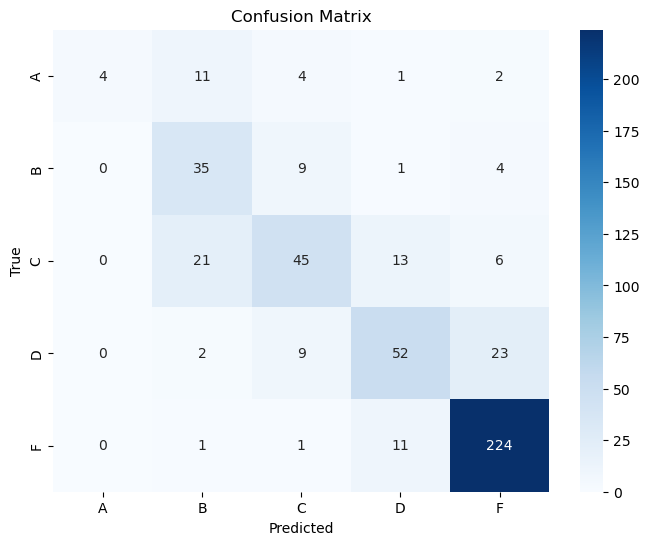

Accuracy: 0.7516


In [ ]:
# Predict on the test set
y_pred = model.predict(X_test)

# Convert predictions from one-hot encoding to class labels (since we are predicting classes)
y_pred_class = np.argmax(y_pred, axis=1)

# Convert the one-hot encoded labels back to class labels (y_test_cat is one-hot encoded)
y_test_class = np.argmax(y_test_cat, axis=1)

# Print Classification Report (precision, recall, f1-score)
print("Classification Report:")
print(classification_report(y_test_class, y_pred_class, target_names=['A', 'B', 'C', 'D', 'F']))

# Confusion Matrix
cm = confusion_matrix(y_test_class, y_pred_class)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['A', 'B', 'C', 'D', 'F'], yticklabels=['A', 'B', 'C', 'D', 'F'])
plt.title("Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# You can also calculate accuracy manually if needed:
accuracy = np.mean(y_pred_class == y_test_class)
print(f"Accuracy: {accuracy:.4f}")

In [ ]:
# # # Save the model to a file
#model.save('neural_ne_classification_1.keras')  # Saves the entire model

In [ ]:
# Feature Engineering ////////////////////////////////////////////////Model 2//////////////////////////////////////////////////////////////////////////////////////////////////////

# Engagement Score (Sum of extracurricular activities)
nn_df['EngagementScore'] = nn_df[['Extracurricular', 'Volunteering', 'Sports', 'Music']].sum(axis=1)

# Engagement and Study Interaction (Using Engagement Score, no StudyEfficiency)
nn_df["EngagementStudyInteraction"] = nn_df["EngagementScore"] * nn_df["StudyTimeWeekly"]

# Create Efficiency Level and IsOverwhelmed Feature
# Removed StudyEfficiency-based classification
nn_df['EfficiencyLevel'] = pd.qcut(nn_df['StudyTimeWeekly'], q=3, labels=['Low', 'Medium', 'High'])
nn_df['IsOverwhelmed'] = (nn_df['EfficiencyLevel'] == 'Low') & (nn_df['StudyTimeWeekly'] > 10) & (nn_df['GPA'] < 2.0)

# Mapping the Efficiency Level
efficiency_map = {'Low': 0, 'Medium': 1, 'High': 2}
nn_df['EfficiencyLevel'] = nn_df['EfficiencyLevel'].map(efficiency_map)

# Converting IsOverwhelmed to an integer
nn_df['IsOverwhelmed'] = nn_df['IsOverwhelmed'].astype(int)

# Engagement Support (Interaction between Engagement and Parental Support)
nn_df['EngagementSupport'] = nn_df['EngagementScore'] * nn_df['ParentalSupport']

# Tutoring and Absence Interaction
nn_df['TutoringAbsenceInteraction'] = nn_df['Tutoring'] * nn_df['Absences']

# Select the relevant columns without 'StudyEfficiency'
X = nn_df[['StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering',
           'EngagementScore', 'EngagementStudyInteraction', 'IsOverwhelmed', 'EngagementSupport', 'TutoringAbsenceInteraction']]

y = nn_df['GradeClass']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# One-hot encoding for the target variable (GradeClass)
y_train_cat = to_categorical(y_train, num_classes=5)
y_test_cat = to_categorical(y_test, num_classes=5)

# SMOTE for balancing the classes
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# One-hot encode the resampled target variable
y_train_cat_res = to_categorical(y_train_res, num_classes=5)

# Define the model
model2 = Sequential()
model2.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model2.add(Dropout(0.4))
model2.add(Dense(64, activation='relu'))
model2.add(Dropout(0.3))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(5, activation='softmax'))  # 5 classes for GradeClass

# Compile the model
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model2.fit(X_train_res, y_train_cat_res, validation_data=(X_test, y_test_cat), epochs=150, batch_size=32, callbacks=[early_stopping], verbose=1)




Epoch 1/150


c:\Users\MC\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


152/152 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2980 - loss: 1.7871 - val_accuracy: 0.6534 - val_loss: 0.9839
Epoch 2/150
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4613 - loss: 1.2488 - val_accuracy: 0.6806 - val_loss: 1.0245
Epoch 3/150
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5142 - loss: 1.1617 - val_accuracy: 0.6973 - val_loss: 1.0150
Epoch 4/150
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5488 - loss: 1.1143 - val_accuracy: 0.7203 - val_loss: 0.9416
Epoch 5/150
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6113 - loss: 1.0490 - val_accuracy: 0.7244 - val_loss: 0.9404
Epoch 6/150
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6084 - loss: 1.0361 - val_accuracy: 0.6806 - val_loss: 0.9484
Epoch 7/150
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6254 - loss: 0.9869 - val_accuracy: 0.7098 - val_loss: 0.9155
Epoch 8/150
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6395 - loss: 0.9717 - val_accuracy: 0.6889

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Accuracy: 0.7307
Classification Report:
              precision    recall  f1-score   support

           A       0.29      0.24      0.26        21
           B       0.56      0.52      0.54        54
           C       0.62      0.51      0.56        78
           D       0.53      0.76      0.63        83
           F       0.93      0.88      0.91       243

    accuracy                           0.73       479
   macro avg       0.59      0.58      0.58       479
weighted avg       0.74      0.73      0.73       479

Confusion Matrix:
[[  5   6   2   4   4]
 [ 10  28  11   3   2]
 [  1  13  40  23   1]
 [  0   1  11  63   8]
 [  1   2   1  25 214]]


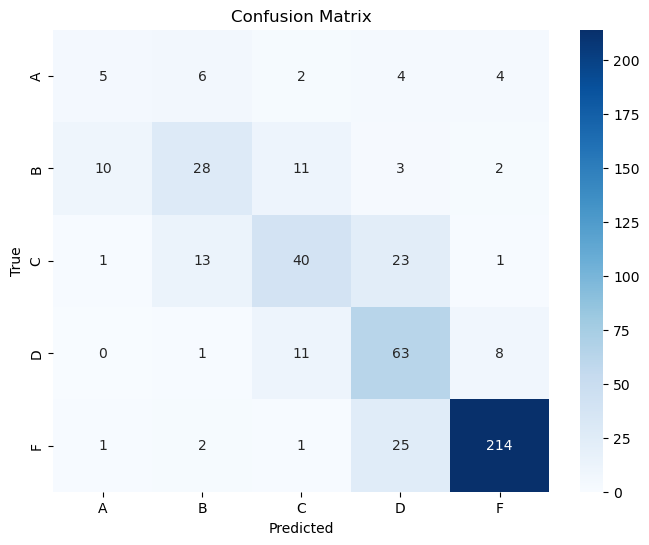

In [37]:
# Evaluate on the test set
y_pred = model2.predict(X_test)

# Convert predictions from probabilities to class labels (using np.argmax)
y_pred_classes = np.argmax(y_pred, axis=1)

# Print Accuracy
accuracy = accuracy_score(y_test, y_pred_classes)
print(f"Accuracy: {accuracy:.4f}")

# Print Classification Report (precision, recall, f1-score)
print(f"Classification Report:\n{classification_report(y_test, y_pred_classes, target_names=['A', 'B', 'C', 'D', 'F'])}")

# Print Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)
print(f"Confusion Matrix:\n{cm}")

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['A', 'B', 'C', 'D', 'F'], yticklabels=['A', 'B', 'C', 'D', 'F'])
plt.title("Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
# # # Save the model to a file
#model.save('neural_ne_classification_2.keras')  # Saves the entire model

### 10. Comparison of Models

### 11. Web Application